In [18]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import cluster, metrics

#試取資料
file = open("../log/n3 (1).pickle", "rb")
data = pickle.load(file)
file.close()

print(data)

{'record_format_version': 2, 'ml': {'scene_info': [{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (100, 388), 'platform': (70, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50

In [19]:
scene_info = data['ml']['scene_info']
scene_command = data['ml']['command']
print(scene_info)
print(scene_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (100, 388), 'platform': (70, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bric

In [20]:
for i in range(2, 101):
    path = "../log/n3 (" + str(i) + ").pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    scene_info = scene_info + data['ml']['scene_info']
    scene_command = scene_command + data['ml']['command']
    file.close()
    
print(len(scene_info))
print(len(scene_command))

694415
694415


In [21]:
# 提取特徵

scene_info = data['ml']['scene_info']
scene_command = data['ml']['command']

Ball_x = []
Ball_y = []
Ball_speed_x = []
Ball_speed_y = []
Direction = []
Platform = []
Command = []

for i, s in enumerate(scene_info[1:-2]):
    Ball_x.append(s['ball'][0])
    Ball_y.append(s['ball'][1])
    Platform.append(s['platform'][0])
    Ball_speed_x.append(scene_info[i+2]["ball"][0] - scene_info[i+1]["ball"][0])
    Ball_speed_y.append(scene_info[i+2]["ball"][1] - scene_info[i+1]["ball"][1])
    if Ball_speed_x[-1] > 0:
        if Ball_speed_y[-1] > 0:
            # 右下
            Direction.append(0)
        else:
            # 右上
            Direction.append(1)
    else:
        if Ball_speed_y[-1] > 0:
            # 左下
            Direction.append(2)
        else:
            # 左上
            Direction.append(3)
            
for c in scene_command[1:-2]:
    if c == "NONE":
        Command.append(0)
    elif c == "MOVE_LEFT":
        Command.append(-1)
    elif c == "MOVE_RIGHT":
        Command.append(1)


feature = np.array([Ball_x, Ball_y, Ball_speed_x, Ball_speed_y, Direction, Platform])
X = np.transpose(feature) 
y = scene_command

print(feature)

print(scene_command[1])
scene_command[1] = 0

[[ 93  86  79 ... 119 126 133]
 [395 388 381 ... 378 385 392]
 [ -7  -7  -7 ...   7   7   7]
 [ -7  -7  -7 ...   7   7   7]
 [  3   3   3 ...   0   0   0]
 [ 75  70  75 ... 105 100  95]]
MOVE_LEFT


In [22]:
# 提取特徵
import numpy as np

scene_info = data['ml']['scene_info']
sene_command = data['ml']['command']

k = range(1, len(scene_info)-1)

ball_x = np.array([scene_info[i]['ball'][0] for i in k])
ball_y = np.array([scene_info[i]['ball'][1] for i in k])
ball_speed_x = np.array([scene_info[i+1]['ball'][0] - scene_info[i]['ball'][0] for i in k])
ball_speed_y = np.array([scene_info[i+1]['ball'][1] - scene_info[i]['ball'][1] for i in k])
direction = np.where(np.vstack((ball_speed_x, ball_speed_y)) > 0, [[1],[0]], [[2],[3]]).sum(axis=0)  # x y: ++1, +-4, -+2, --3
platform = np.array([scene_info[i]['platform'][0] for i in k])
target = np.where(np.array(scene_command) == 'NONE', 0,
                  np.where(np.array(scene_command) == 'MOVE_LEFT', -1, 1))[1:-1]  # [0] SERVE_TO_RIGHT, [1897] None


In [23]:
for i in range(2, len(scene_info) - 1):
    g = scene_info[i]
    feature = np.hstack((ball_x.reshape(-1, 1),
               ball_y.reshape(-1, 1),
               ball_speed_x.reshape(-1, 1),
               ball_speed_y.reshape(-1, 1),
               direction.reshape(-1, 1),
               platform.reshape(-1, 1)))
    if scene_command[i] == "NONE": scene_command[i] = 0
    elif scene_command[i] == "MOVE_LEFT": scene_command[i] = 1
    else: scene_command[i] = 2
    
answer = np.array(scene_command[1:-1])

print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 93 395  -7  -7   5  75]
 [ 86 388  -7  -7   5  70]
 [ 79 381  -7  -7   5  75]
 ...
 [126 385   7   7   1 100]
 [133 392   7   7   1  95]
 [140 399   7   7   1  95]]
(5577, 6)
[0 2 0 ... 1 0 2]
(5577,)


In [24]:
import matplotlib.pyplot as plt

feature

array([[ 93, 395,  -7,  -7,   5,  75],
       [ 86, 388,  -7,  -7,   5,  70],
       [ 79, 381,  -7,  -7,   5,  75],
       ...,
       [126, 385,   7,   7,   1, 100],
       [133, 392,   7,   7,   1,  95],
       [140, 399,   7,   7,   1,  95]])

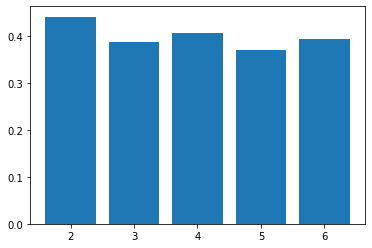

[0.4414686475480807, 0.3875041795753131, 0.40617522821975716, 0.36994583902079353, 0.3949123828325799]


In [25]:
# 迴圈
import matplotlib.pyplot as plt
silhouette_avgs = []
ks = range(2, 7)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(feature)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(feature, cluster_labels) # -1 ~ 1
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)